# Week 8 Lab

## Swiss Rolls and SVCs

Start by loading a couple toolkits and packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold, datasets, svm

Next, load the Swirl.npy data. Assess the dimension of the data as well

In [3]:
Swirl = np.load('Swirl.npy')

# Find the shape or dimension of the Swirl data here
Swirl.shape

(1000, 3)

Based on the dimensions of Swirl, we are going to plot the data in 3D. I'll be using the Axes3D toolkit for this.

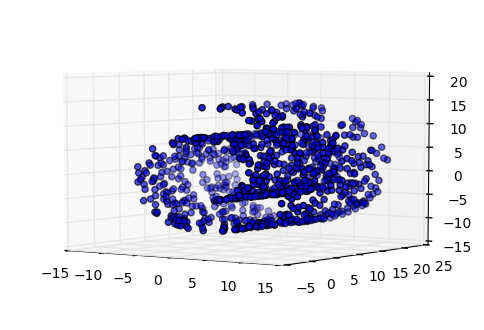

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#play around with viewing in 3D
ax.view_init(5,-55)

ax.scatter(Swirl[:,0],Swirl[:,1],Swirl[:,2], c = 'b', marker='o')

plt.show()

The initial viewing projection for our plot was [15,-75]. Try a few other orientations to get an idea for the shape of the data.

In [ ]:
# Do a few plots using different ax.view_init() values


# Bonus (1 pt.): Write a for loop that automatically plots ten different projections from (0,0) to (90,-90) in one figure

I've also included an array that designates the type of each point. Go ahead and load 'Point_ID.npy' as an array 'point_id' below. 
What are the dimensions of 'point_id' ?
How many different *types* of points are there in 'point_id' ? [hint: numpy.unique]

In [13]:
# code for loading point_id
point_id = np.load('Point_ID.npy')
# code for finding dimensions of point_id
point_id.shape
# number of types in point_id
len(np.unique(point_id))

4

Now we are going to graph our Swirl data according to the point IDs.

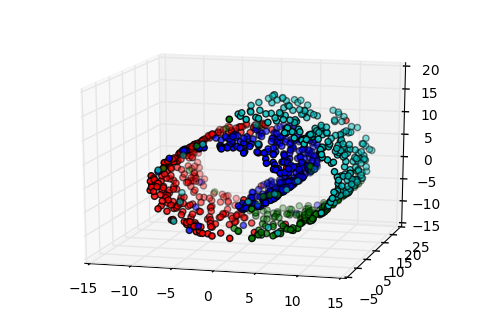

In [15]:
# sit back and enjoy

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#play around with viewing in 3D
ax.view_init(15, -75)
color = ['r','b','g','c','m','k']
for i in np.arange(1,len(np.unique(point_id))+1):
    ax.scatter(Swirl[point_id==i,0],Swirl[point_id==i,1],Swirl[point_id==i,2], c=color[i-1], marker='o')

plt.show()

We are now going to use an amazing little function from scikit learn called SVC. SVC stands for Support Vector Classification. This function takes a data set and applies Support Vector Machine discrimination on high dimensional data. But our first step is to make a set of training data and test data.

In [ ]:
# first it is a good idea to test if the length of the coordinate data is the same as the length of the 
## ID data
len(point_id)==len(Swirl)


In [19]:
# For my training data, I want a set of indices randomly selected from 0 to 1000, non-inclusive.
# I'll make my training data 90% of the total data set.
train_ind = np.random.choice(np.arange(0,len(point_id)), size=(len(point_id)*0.9), replace=False, p=None)
train_ind
# check train_ind to make sure it is the proper length and contains no repeats [hint: use set() and a Boolean]
len(np.unique(train_ind)) == len(train_ind)
# your code here


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


True

In [20]:
np.arange(0, len(point_id))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Now you need to make an array of test indices (call is "test_ind") that don't overlap with the training indices. 
hint: numpy.delete

In [29]:
# test_ind code here

a = np.array([1,1,3,1,4,5,6])
b = np.array([1,3,5])
test_ind = np.setdiff1d(np.arange(0, len(point_id)),train_ind)
test_ind.shape

(100,)

We are now going to use the SVC function to try to classify out training data

In [36]:
from sklearn.svm import SVC
identify = SVC()

identify.fit(Swirl[train_ind,:],point_id[train_ind])# hint: *training data* <= Swirl[train_ind,:]

predicted = identify.predict(Swirl[test_ind,:])
predicted

array([2, 2, 1, 2, 2, 1, 2, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 3, 2, 2,
       2, 4, 2, 1, 2, 4, 2, 2, 4, 2, 2, 1, 4, 2, 1, 4, 4, 4, 1, 2, 2, 2, 3,
       1, 4, 2, 1, 4, 4, 2, 1, 3, 1, 2, 3, 2, 1, 2, 2, 2, 4, 3, 3, 4, 2, 4,
       4, 2, 1, 2, 1, 2, 3, 2, 4, 4, 4, 1, 4, 1, 2, 3, 2, 2, 2, 2, 3, 2, 1,
       2, 2, 4, 1, 3, 2, 2, 1])

In [39]:
np.mean(point_id[test_ind] ==predicted)

0.93999999999999995

In [30]:
Swirl[train_ind,:]

array([[ -5.25173155,  17.63987397,   6.68170164],
       [  6.22083553,   1.9326106 ,  -0.31635548],
       [ 12.39314808,  10.9474499 ,  -1.81749394],
       ..., 
       [ 12.43983399,  15.80958351,   3.70999131],
       [ 12.29842965,  13.92206546,  -1.86452456],
       [ -3.51534012,   9.98089202, -10.09086399]])

In [32]:
Swirl[train_ind,:]

array([1, 2, 4, 2, 1, 1, 3, 3, 4, 2, 3, 2, 1, 1, 4, 4, 2, 3, 2, 4, 3, 3, 4,
       2, 4, 2, 2, 3, 3, 2, 3, 1, 3, 1, 1, 2, 1, 1, 4, 2, 2, 2, 1, 4, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 4, 4, 2, 2, 3, 2, 4, 1, 1, 4, 3, 2, 2,
       1, 1, 2, 4, 4, 1, 2, 2, 4, 1, 1, 2, 2, 4, 2, 3, 1, 3, 1, 3, 1, 2, 4,
       2, 2, 1, 3, 4, 2, 1, 4, 2, 4, 4, 2, 2, 4, 2, 3, 2, 2, 2, 2, 3, 4, 1,
       2, 2, 3, 1, 2, 3, 2, 1, 2, 3, 4, 2, 4, 2, 1, 4, 2, 2, 1, 1, 4, 3, 1,
       1, 2, 2, 2, 4, 1, 4, 3, 1, 4, 2, 1, 2, 1, 2, 4, 3, 1, 2, 1, 2, 3, 1,
       1, 1, 4, 2, 4, 4, 2, 2, 1, 2, 1, 4, 4, 3, 2, 2, 1, 2, 2, 2, 4, 4, 1,
       4, 2, 2, 2, 2, 1, 1, 2, 3, 1, 4, 2, 1, 2, 1, 3, 1, 2, 1, 4, 3, 1, 2,
       1, 2, 1, 3, 1, 1, 3, 3, 4, 2, 3, 4, 2, 1, 2, 3, 2, 4, 2, 1, 2, 2, 2,
       1, 4, 2, 3, 2, 2, 1, 4, 3, 3, 1, 2, 2, 1, 2, 1, 2, 2, 2, 4, 2, 4, 1,
       4, 1, 4, 1, 1, 2, 2, 3, 2, 4, 4, 2, 2, 2, 4, 2, 1, 1, 3, 4, 2, 2, 3,
       3, 2, 3, 1, 2, 1, 2, 2, 1, 1, 1, 4, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       3, 4,

Compare your predicted IDs to the actual IDs
How accurate was this method?

In [ ]:
# What proportion of the predicted IDs was correct?

Bonus (1 pt.): Graph the entire data set. Plot training data in grey, accurate predictions in green, and erroneous predictions in red